In [5]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
base_dir_mc_dy = "/home/olivito/datasci/spark/clustertest/dimuonReduced_DYJetsToLL_20000_171220_141841/"
input_path_mc_dy_mll = base_dir_mc_dy + "mll_merged.parquet"
input_path_mc_dy_counts = base_dir_mc_dy + "count.parquet"
df_mll_mc_dy = pq.ParquetDataset(input_path_mc_dy_mll).read().to_pandas()
df_counts_mc_dy = pq.ParquetDataset(input_path_mc_dy_counts).read().to_pandas()

In [41]:
base_dir_mc_zz4mu = "/home/olivito/datasci/spark/clustertest/dimuonReduced_ZZTo4mu_171220_134613/"
input_path_mc_zz4mu_mll = base_dir_mc_zz4mu + "mll_merged.parquet"
input_path_mc_zz4mu_counts = base_dir_mc_zz4mu + "count.parquet"
df_mll_mc_zz4mu = pq.ParquetDataset(input_path_mc_zz4mu_mll).read().to_pandas()
df_counts_mc_zz4mu = pq.ParquetDataset(input_path_mc_zz4mu_counts).read().to_pandas()

In [42]:
base_dir_data = "/home/olivito/datasci/spark/clustertest/dimuonReduced_SingleMu_Run2012B_171220_162746/"
input_path_data_mll = base_dir_data + "mll_merged.parquet"
input_path_data_counts = base_dir_data + "count.parquet"
df_mll_data = pq.ParquetDataset(input_path_data_mll).read().to_pandas()
df_counts_data = pq.ParquetDataset(input_path_data_counts).read().to_pandas()

In [43]:
print len(df_mll_mc_dy)
print len(df_mll_mc_zz4mu)
print len(df_mll_data)
df_mll_mc_dy.head()

1416000
298217
2040855


,mll
0,92.448212
1,96.570663
2,90.192520
3,90.843185
4,91.686333


In [44]:
print len(df_counts_mc_dy)
print len(df_counts_data)
df_counts_mc_dy.head()

1
1


,count
0,12778258


In [47]:
nevents_mc_dy = df_counts_mc_dy['count'].sum()
nevents_mc_zz4mu = df_counts_mc_zz4mu['count'].sum()
nevents_data = df_counts_data['count'].sum()
print nevents_mc_dy
print nevents_mc_zz4mu
print nevents_data

12778258
1499064
59538958


In [71]:
lumi = 4.43 # in fb-1, for 2012B
xsec_dy = 3531.15 # in pb, not sure if there's a higher order value
weight_dy = lumi * xsec_dy * 1000. / nevents_mc_dy
print weight_dy
weights_dy = weight_dy * np.ones(len(df_mll_mc_dy))
xsec_zz4mu = 5.196 * 0.03 * 0.03 # in pb, LO, including BR to 4mu
weight_zz4mu = lumi * xsec_zz4mu * 1000. / nevent_mc_zz4mu
print weight_zz4mu
weights_zz4mu = weight_zz4mu * np.ones(len(df_mll_mc_zz4mu))

1.22418834398
1.3819591425e-05


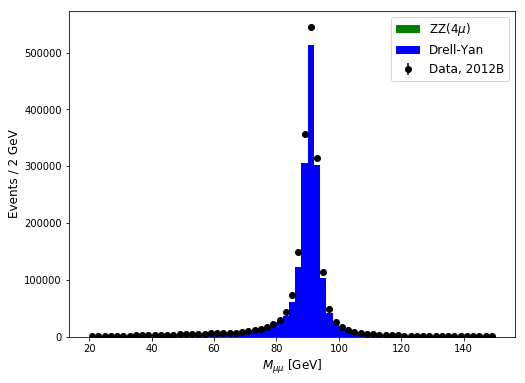

In [148]:
fig = plt.figure(figsize=(8,6))

# set up binning.  get also bin centers, to use for data points
bin_size = 2
xmin = 20
xmax = 151 # should make this slightly larger than the desired end point of the plot
binning = np.arange(xmin,xmax,bin_size)
binning_centers = np.arange(xmin + bin_size/2.,xmax,bin_size)

# for MC, can plot all together as a stacked histogram
plt.hist([df_mll_mc_zz4mu['mll'],df_mll_mc_dy['mll']],
         weights=[weights_zz4mu,weights_dy],
         label=['ZZ(4$\mu$)','Drell-Yan'],
         color=['green','blue'],
         bins=binning, histtype='bar', stacked=True
        )

# for data, get the bin counts and plot with error bars
hist_data,_ = np.histogram(df_mll_data['mll'],binning)
errors_data = np.sqrt(hist_data)
plt.errorbar(binning_centers, hist_data, errors_data,
             linestyle='none', marker='o', color='black', label='Data, 2012B'
            )

# add axis labels and legend
plt.xlabel('$M_{\mu\mu}$ [GeV]',fontsize='large')
plt.ylabel('Events / '+str(bin_size)+' GeV',fontsize='large')
plt.legend(fontsize='large')

plt.show()